<a href="https://colab.research.google.com/github/Mitali2303/Probability-Projects-/blob/main/23110206_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Mitali Ashok Agrawal**

**Roll no.: 23110206**

Here I have just imported the different inbuilt functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Here I have taken the photos using the inbuilt function plt.imread

In [ ]:
tom=plt.imread("/content/tom.jpeg",0)
panther=plt.imread("/content/panther.jpeg",0)
bookpage1=plt.imread("/content/bookpage_1.jpeg",0)
bookpage2=plt.imread("/content/bookpage_2.jpeg",0)

Here I have created the histogram function, in which I have taken i as a row element and j as column element and created one array histo in which I have stored the frequency of every point taking intensity as index of that histo array. Then I have created array phisto which means probability of every pixel.

In [ ]:
def histogram(img):
  histo=np.zeros(256,dtype=int)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
           intensity=img[i,j]
           histo[intensity]+=1

  #Calculating Probability of each intensity
  phisto=histo/(img.shape[0]*img.shape[1])
  return(phisto)


In the following code block, I have created the function to calculate the threshold using the method of Within class variance.

I have to calculate threshold because:
* If the intensity of a pixel in the input image is greater than a       threshold, the corresponding output pixel is marked as white (foreground), and if the input pixel intensity intensity is less than or equal to the threshold, the output pixel location is marked black (background).

What I have done?
*   In this method I have varied threshold from 0 to 255 and calculated  the [th=(vw1)+(vw2)] for each i and noted the i for which the th is makimum, that will be my threshold.
*   Here vw1= product of varaince of phisto less than equal to i and summation of probabilities of intensities less than equal to i.
*   vw2 is product of variance of probabilities greater than i and summation of probabilities of intensities greater than i.













In [ ]:
def threshold(img):
  phisto=histogram(img)
  min=np.inf
  thresh=0
  for i in range(256):
    w1=0
    uw1=0
    w2=0
    uw2=0
    for t in range(i+1):
      w1+=phisto[t]
      uw1+=(t*phisto[t])
    for t in range(i+1,256):
      w2+=phisto[t]
      uw2+=(t*phisto[t])
    if w1==0 or w2==0:
      continue
    u1=uw1/w1
    u2=uw2/w2
    vw1=0
    vw2=0
    for t in range(i+1):
      vw1+=phisto[t]*((t-u1)**2)
    for t in range(i+1,256):
      vw2+=phisto[t]*((t-u2)**2)

    th=(vw1)+(vw2)
    if min>th:
      min=th
      thresh=i


  return(thresh)


This is the second method to calculate threshold which is called Within class Variance.

In [ ]:
#Second Method to claculate Threshold

def M2_threshold(img):
  phisto=histogram(img)
  max=-np.inf
  thresh=0
  for i in range(256):
    w1=0
    uw1=0
    w2=0
    uw2=0
    for t in range(i+1):
      w1+=phisto[t]
      uw1+=(t*phisto[t])
    for t in range(i+1,256):
      w2+=phisto[t]
      uw2+=(t*phisto[t])
    if w1==0 or w2==0:
      continue
    u1=uw1/w1
    u2=uw2/w2

    th=w1*w2*(u1-u2)**2
    if max<th:
      max=th
      thresh=i

  return(thresh)


In this method I have just applied the concept mentioned in the above i.e. if intensity is greater than threshold then i have fixed the intensity of that part as 255 and 0 else.

In [ ]:
def finalimg(img):
  finalimg=img.copy()
  th=threshold(img)
  for i in range(img.shape[0]):
     for j in range(img.shape[1]):
         intensity=img[i,j][0]
         if intensity > th:
           finalimg[i,j]=255
         else:
           finalimg[i,j]=0
  return finalimg

# This is to create the final image array using 2nd Method's threshold
def M2_finalimg(img):
  finalimg=img.copy()
  th=M2_threshold(img)
  for i in range(img.shape[0]):
     for j in range(img.shape[1]):
         intensity=img[i,j][0]
         if intensity > th:
           finalimg[i,j]=255
         else:
           finalimg[i,j]=0
  return finalimg



The following is the code to print the image seperately.

In [ ]:
#printing Sourceimage and Processed image

def printimg(img):
  plt.figure()
  plt.title('Orignal Image')
  plt.imshow(img)
  plt.axis("off")


  plt.figure()
  plt.imshow(finalimg(img),cmap='gray')
  plt.title("Processed image")
  plt.axis('off')
  plt.show()



The following code is to print the orignal image and processed image side by side.

In [ ]:
def printimg1(img):
  fig, axes = plt.subplots(1, 2)
  plt.figure()
  axes[0].set_title('Orignal Image')
  axes[0].imshow(img)
  axes[0].axis("off")


  plt.figure()
  axes[1].imshow(finalimg(img),cmap='gray')
  axes[1].set_title("Processed image")
  axes[1].axis('off')
  plt.show()

#This code is to print images created using the 2nd method
def M2_printimg1(img):
  fig, axes = plt.subplots(1, 2)
  plt.figure()
  axes[0].set_title('Orignal Image')
  axes[0].imshow(img)
  axes[0].axis("off")


  plt.figure()
  axes[1].imshow(M2_finalimg(img),cmap='gray')
  axes[1].set_title("Processed image")
  axes[1].axis('off')
  plt.show()

The following are the orignal images and processed image printed using first method .

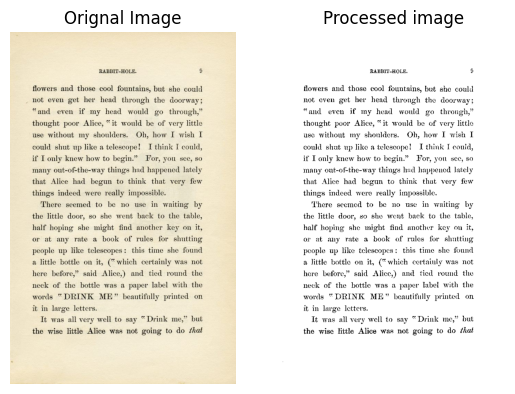

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

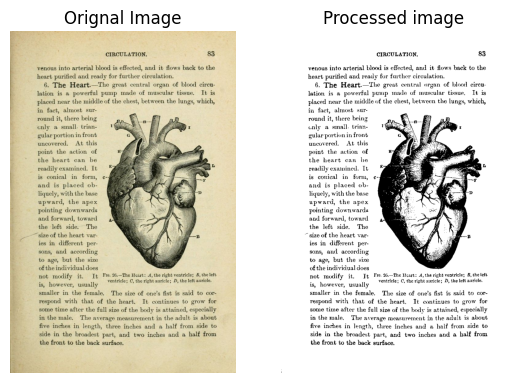

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

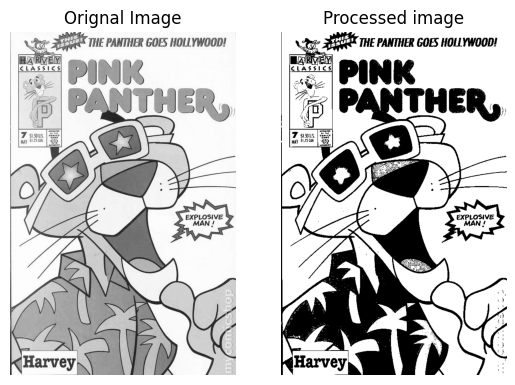

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

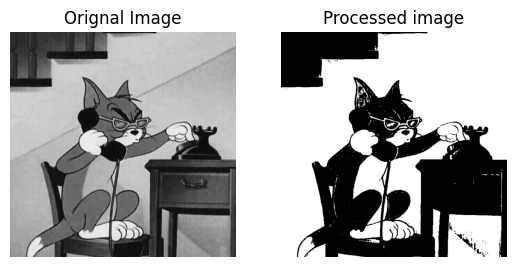

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
printimg1(bookpage1)
printimg1(bookpage2)
printimg1(panther)
printimg1(tom)


Following are images printed using second method.

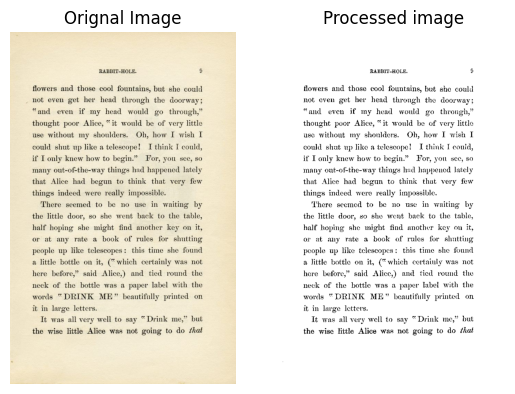

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

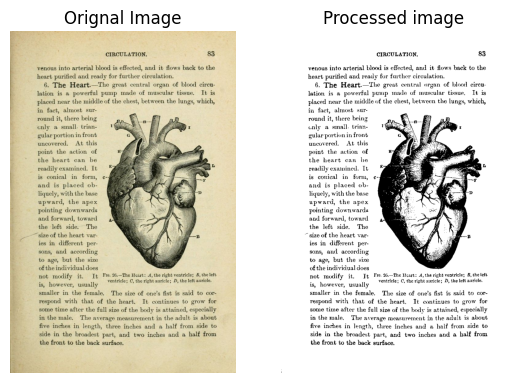

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

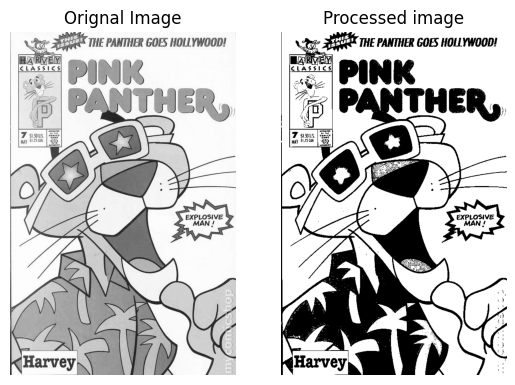

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

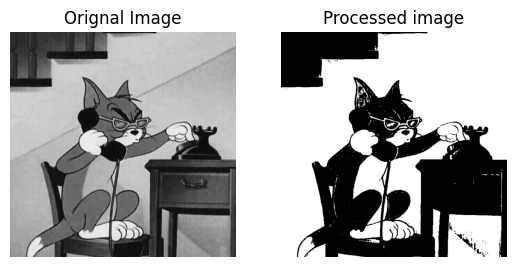

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
M2_printimg1(bookpage1)
M2_printimg1(bookpage2)
M2_printimg1(panther)
M2_printimg1(tom)

Following is just sample image given on website provided in the classroom to check my result:

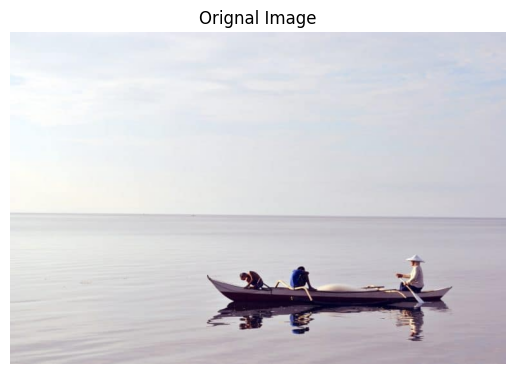

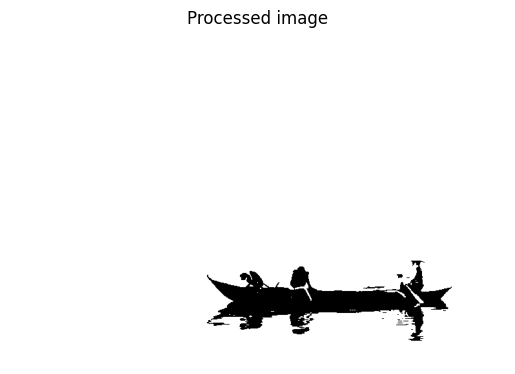

(-0.5, 767.5, 513.5, -0.5)

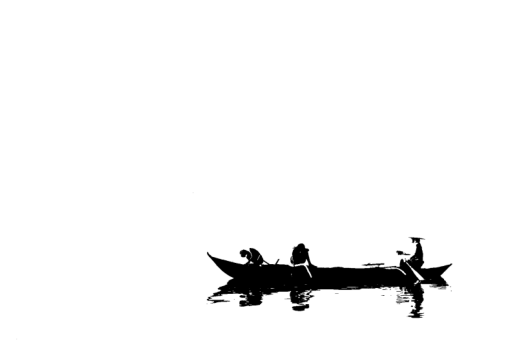

In [ ]:
boat=plt.imread('/content/boat_initial-768x514.jpg',0)
printimg(boat)
boatresult=cv2.imread('/content/otsu_result-768x514.webp')
plt.figure()
plt.imshow(boatresult)
plt.axis("off")


The following is the code to add gausiian noise in the image.

np.random.normal(0, variance, image.shape): This function call generates random numbers from a normal distribution with a mean of 0 and a standard deviation determined by the variance parameter. The shape of the output array is determined by image.shape.

In [ ]:
def add_gaussian_noise(image, variance):
    noise = np.random.normal(0, variance, image.shape)
    image_with_noise = image + noise
    # Clip values to ensure they remain in the valid range [0, 255]
    image_with_noise = np.clip(image_with_noise, 0, 255)
    return image_with_noise.astype(np.uint8)


Following is the code written to add gaussian noise in the image and printing the image having variance 10, 30 and 60 as the gaussian noise.

In [ ]:
def Print_noise(image):
  variances=[10,30,60]
  plt.figure(figsize=(15,10))
  plt.subplot(1,len(variances)+1,1)
  plt.imshow(image,cmap='gray')
  plt.title('Original Image')
  plt.axis("off")

  for i in range(3):
    plt.subplot(1,len(variances)+1,i+2)
    plt.imshow(finalimg(add_gaussian_noise(image,variances[i])),cmap='gray')
    plt.title(f'Noisy Image (variance={variances[i]})')
    plt.axis('off')

  plt.show()
  return ''




Following are the binarised images with the added noise.  

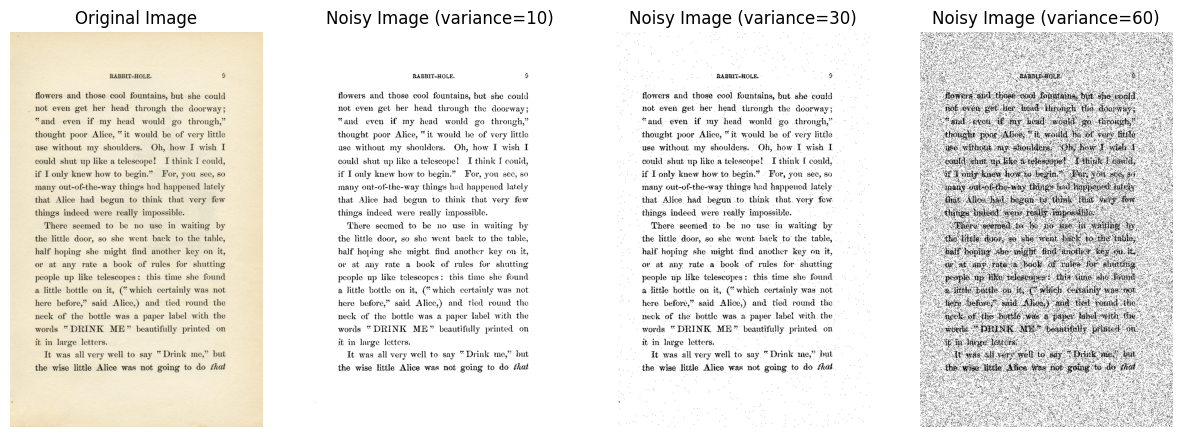

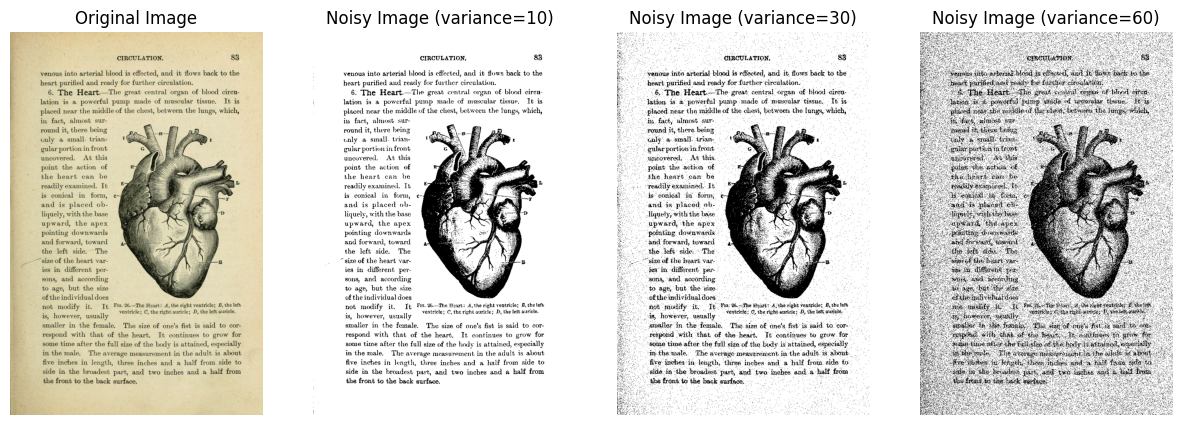

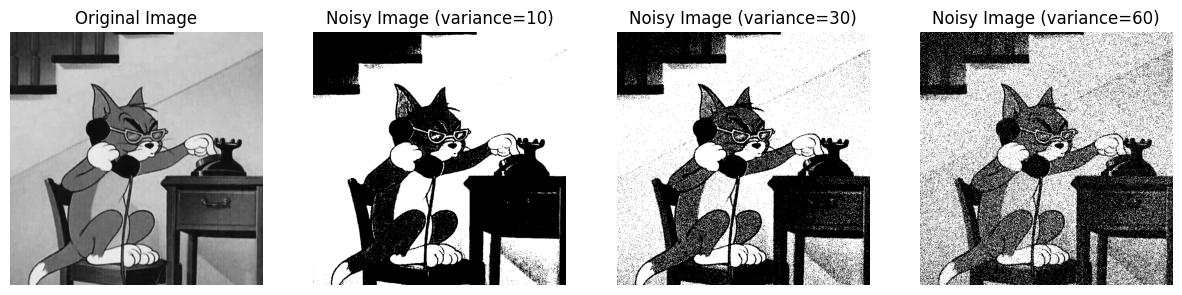

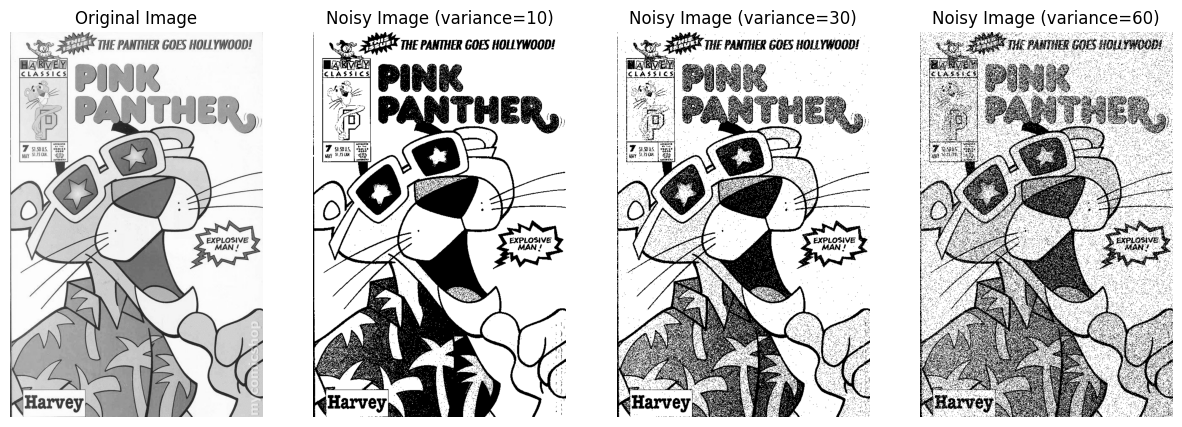

''

In [ ]:
Print_noise(bookpage1)
Print_noise(bookpage2)
Print_noise(tom)
Print_noise(panther)

Observations:


*   The large mean difference indicates that there is large between class variance (The 2nd Method used)
*   When mean difference is constant than maximum between class variance can be reach by wc1=wc2 , where wc1 and wc2 is probability in 0 to threshold and threshold+1 to 255 respectively.





Sources Used:
https://learnopencv.com/otsu-thresholding-with-opencv/


https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
